# Zastosowanie drzew decyzyjnych oraz lasów losowych przy, gdzie y reprezentowany jest przez dane typu ciągłego**


## 1. Biblioteki

In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
from sklearn.ensemble import RandomForestClassifier  #ładowanie fukcji do tworzenia instacji drzew dla Y ciaglego
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt 

from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer

import seaborn as sns

from sklearn.model_selection import cross_val_score,  StratifiedKFold


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score



## 2. Wczytuje  i sprawdzam typ danych

In [3]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_T.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [4]:
train_df

,ENSG00000168779.18,ENSG00000043355.9,ENSG00000139800.8,ENSG00000095752.5,ENSG00000114270.14,ENSG00000143320.7,ENSG00000104112.7,ENSG00000168703.5,ENSG00000116176.6,ENSG00000188523.7,...,ENSG00000104755.13,ENSG00000250256.1,ENSG00000259447.1,ENSG00000235864.1,ENSG00000227718.1,ENSG00000229370.1,ENSG00000254434.1,ENSG00000233146.1,ENSG00000251969.3,scale
0,6.418540,2.139513,2.139513,9.984396,139.068370,134.076172,11.410738,67.038086,173.300584,16.402936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.426342,0.713171,0.000000,T1
1,4.254904,0.850981,0.000000,0.850981,45.101982,22.125501,84.247098,1.701962,11.913731,5.956866,...,0.850981,0.000000,0.850981,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
2,1.931528,0.643843,0.000000,40.562078,452.621281,237.577884,6.438425,0.000000,16.096063,3.219213,...,0.000000,0.000000,0.643843,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
3,0.870129,0.000000,0.000000,123.558325,773.544728,262.778974,15.662323,2.610387,70.480453,1.740258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.870129,T1
4,2.718041,2.718041,2.718041,39.411591,145.415179,88.336324,19.026285,1167.398495,16.308244,16.308244,...,1.359020,0.000000,1.359020,1.359020,1.359020,0.0,0.000000,0.000000,0.000000,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,12.991861,2.362157,0.000000,1.181078,242.121051,54.329602,11.810783,3.543235,120.469986,1.181078,...,1.181078,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
951,9.498885,0.527716,0.000000,6.332590,184.172817,132.984384,8.971169,0.527716,26.913506,6.860306,...,0.527716,1.055432,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
952,0.000000,0.000000,0.000000,0.000000,434.417898,118.161668,159.865787,152.915100,28.961193,77.615998,...,0.000000,0.000000,0.000000,1.158448,0.000000,0.0,0.000000,0.000000,0.000000,T3
953,24.591858,16.394572,0.000000,21.859430,1153.084920,2191.407833,13.662144,5.464857,360.680591,0.000000,...,0.000000,8.197286,0.000000,0.000000,2.732429,0.0,0.000000,0.000000,0.000000,T3


In [5]:
train_df

,ENSG00000168779.18,ENSG00000043355.9,ENSG00000139800.8,ENSG00000095752.5,ENSG00000114270.14,ENSG00000143320.7,ENSG00000104112.7,ENSG00000168703.5,ENSG00000116176.6,ENSG00000188523.7,...,ENSG00000104755.13,ENSG00000250256.1,ENSG00000259447.1,ENSG00000235864.1,ENSG00000227718.1,ENSG00000229370.1,ENSG00000254434.1,ENSG00000233146.1,ENSG00000251969.3,scale
0,6.418540,2.139513,2.139513,9.984396,139.068370,134.076172,11.410738,67.038086,173.300584,16.402936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.426342,0.713171,0.000000,T1
1,4.254904,0.850981,0.000000,0.850981,45.101982,22.125501,84.247098,1.701962,11.913731,5.956866,...,0.850981,0.000000,0.850981,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
2,1.931528,0.643843,0.000000,40.562078,452.621281,237.577884,6.438425,0.000000,16.096063,3.219213,...,0.000000,0.000000,0.643843,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
3,0.870129,0.000000,0.000000,123.558325,773.544728,262.778974,15.662323,2.610387,70.480453,1.740258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.870129,T1
4,2.718041,2.718041,2.718041,39.411591,145.415179,88.336324,19.026285,1167.398495,16.308244,16.308244,...,1.359020,0.000000,1.359020,1.359020,1.359020,0.0,0.000000,0.000000,0.000000,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,12.991861,2.362157,0.000000,1.181078,242.121051,54.329602,11.810783,3.543235,120.469986,1.181078,...,1.181078,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
951,9.498885,0.527716,0.000000,6.332590,184.172817,132.984384,8.971169,0.527716,26.913506,6.860306,...,0.527716,1.055432,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
952,0.000000,0.000000,0.000000,0.000000,434.417898,118.161668,159.865787,152.915100,28.961193,77.615998,...,0.000000,0.000000,0.000000,1.158448,0.000000,0.0,0.000000,0.000000,0.000000,T3
953,24.591858,16.394572,0.000000,21.859430,1153.084920,2191.407833,13.662144,5.464857,360.680591,0.000000,...,0.000000,8.197286,0.000000,0.000000,2.732429,0.0,0.000000,0.000000,0.000000,T3


In [6]:
train_df['scale'].value_counts()

T1    496
T3    327
T2    132
Name: scale, dtype: int64

In [7]:
y=train_df['scale']
del train_df['scale']

In [8]:
train_df

,ENSG00000168779.18,ENSG00000043355.9,ENSG00000139800.8,ENSG00000095752.5,ENSG00000114270.14,ENSG00000143320.7,ENSG00000104112.7,ENSG00000168703.5,ENSG00000116176.6,ENSG00000188523.7,...,ENSG00000248740.4,ENSG00000104755.13,ENSG00000250256.1,ENSG00000259447.1,ENSG00000235864.1,ENSG00000227718.1,ENSG00000229370.1,ENSG00000254434.1,ENSG00000233146.1,ENSG00000251969.3
0,6.418540,2.139513,2.139513,9.984396,139.068370,134.076172,11.410738,67.038086,173.300584,16.402936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.426342,0.713171,0.000000
1,4.254904,0.850981,0.000000,0.850981,45.101982,22.125501,84.247098,1.701962,11.913731,5.956866,...,1.701962,0.850981,0.000000,0.850981,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,1.931528,0.643843,0.000000,40.562078,452.621281,237.577884,6.438425,0.000000,16.096063,3.219213,...,0.643843,0.000000,0.000000,0.643843,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.870129,0.000000,0.000000,123.558325,773.544728,262.778974,15.662323,2.610387,70.480453,1.740258,...,0.870129,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.870129
4,2.718041,2.718041,2.718041,39.411591,145.415179,88.336324,19.026285,1167.398495,16.308244,16.308244,...,0.000000,1.359020,0.000000,1.359020,1.359020,1.359020,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,12.991861,2.362157,0.000000,1.181078,242.121051,54.329602,11.810783,3.543235,120.469986,1.181078,...,0.000000,1.181078,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
951,9.498885,0.527716,0.000000,6.332590,184.172817,132.984384,8.971169,0.527716,26.913506,6.860306,...,0.000000,0.527716,1.055432,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
952,0.000000,0.000000,0.000000,0.000000,434.417898,118.161668,159.865787,152.915100,28.961193,77.615998,...,0.000000,0.000000,0.000000,0.000000,1.158448,0.000000,0.0,0.000000,0.000000,0.000000
953,24.591858,16.394572,0.000000,21.859430,1153.084920,2191.407833,13.662144,5.464857,360.680591,0.000000,...,40.986431,0.000000,8.197286,0.000000,0.000000,2.732429,0.0,0.000000,0.000000,0.000000


In [11]:
ftwo_scorer = make_scorer(f1_score,greater_is_better=True, average='macro')

In [12]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)

## 7.2 Losowe lasy drzew decyzyjnych

## 7.3 Hiperparametry Wszystkie

### 7.3.1 Hiperparametry Wszystkie part1

In [13]:
param_grid = {
    'criterion':['gini', 'entropy'], #
    'min_samples_split':range(2,15,5), #
    'min_samples_leaf': range(1,15,5),  #   
    'max_leaf_nodes':range(2,15,5),  #
    'min_impurity_decrease':[0,0.1], #
    'max_depth':list(range(2, 15,5)), #
    'min_weight_fraction_leaf':[0,0.1,0.2],
    'max_features':['auto','sqrt','log2'],
    'n_estimators':[100,500] #
}

In [16]:
rf_2 = RandomForestClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid, 
                          cv = 5, n_jobs = 4, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 5832 candidates, totalling 29160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 7, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': range(2, 15, 5),
                         'min_impurity_decrease': [0, 0.1],
                         'min_samples_leaf': range(1, 15, 5),
                         'min_samples_split': range(2, 15, 5),
                         'min_weight_fraction_leaf': [0, 0.1, 0.2],
                         'n_estimators': [100, 500]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [17]:
grid_search_2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=12, max_leaf_nodes=12,
                       min_impurity_decrease=0, min_samples_leaf=11,
                       min_weight_fraction_leaf=0, random_state=42)

In [18]:
grid_search_2.best_score_

0.41665901558028134

In [19]:
grid_search_2.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'auto',
 'max_leaf_nodes': 12,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 11,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 100}

In [21]:
grid_search_2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=12, max_leaf_nodes=12,
                       min_impurity_decrease=0, min_samples_leaf=11,
                       min_weight_fraction_leaf=0, random_state=42)

### 7.3.2 Hiperparametry Wszystkie part2

In [23]:
param_grid = {
    'criterion':['entropy'], #
    'min_samples_split':range(10,46,5), #
    'min_samples_leaf': range(10,46,5),  #   
    'max_leaf_nodes':range(10,46,5),  #
    'min_impurity_decrease':[0], #
    'max_depth':list(range(10, 46,5)), #
    'min_weight_fraction_leaf':[0],
    'max_features':['auto'],
    'n_estimators':[100,200] #
}

In [25]:
rf_2 = RandomForestClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid, 
                          cv = 5, n_jobs = 5, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 8192 candidates, totalling 40960 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=5,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [10, 15, 20, 25, 30, 35, 40, 45],
                         'max_features': ['auto'],
                         'max_leaf_nodes': range(10, 46, 5),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(10, 46, 5),
                         'min_samples_split': range(10, 46, 5),
                         'min_weight_fraction_leaf': [0],
                         'n_estimators': [100, 200]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [26]:
grid_search_2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=35,
                       min_impurity_decrease=0, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0,
                       random_state=42)

In [27]:
grid_search_2.best_score_

0.43621948244911435

In [28]:
grid_search_2.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 35,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 100}

## Dobieranie part 3

In [30]:
param_grid = {
    'criterion':['entropy'], #
    'min_samples_split':range(2,6,1), #
    'min_samples_leaf': range(8,15,1),  #   
    'max_leaf_nodes':range(33,38,1),  #
    'min_impurity_decrease':[0], #
    'max_depth':list(range(13, 19,1)), #
    'min_weight_fraction_leaf':[0],
    'max_features':['auto'],
    'n_estimators':[100] #
}

In [31]:
rf_2 = RandomForestClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid, 
                          cv = 5, n_jobs = 5, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=5,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [13, 14, 15, 16, 17, 18],
                         'max_features': ['auto'],
                         'max_leaf_nodes': range(33, 38),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(8, 15),
                         'min_samples_split': range(2, 6),
                         'min_weight_fraction_leaf': [0],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [32]:
grid_search_2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=37,
                       min_impurity_decrease=0, min_samples_leaf=9,
                       min_weight_fraction_leaf=0, random_state=42)

In [33]:
grid_search_2.best_score_

0.4454928895690299

In [34]:
grid_search_2.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 37,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 100}

## Dobieranie part 4

In [35]:
param_grid = {
    'criterion':['entropy'], #
    'min_samples_split':[2], #
    'min_samples_leaf': [9],  #   
    'max_leaf_nodes':range(37,42,1),  #
    'min_impurity_decrease':[0], #
    'max_depth':[15], #
    'min_weight_fraction_leaf':[0],
    'max_features':['auto'],
    'n_estimators':[100] #
}

In [36]:
rf_2 = RandomForestClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid, 
                          cv = 5, n_jobs = 5, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=5,
             param_grid={'criterion': ['entropy'], 'max_depth': [15],
                         'max_features': ['auto'],
                         'max_leaf_nodes': range(37, 42),
                         'min_impurity_decrease': [0], 'min_samples_leaf': [9],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [37]:
grid_search_2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=38,
                       min_impurity_decrease=0, min_samples_leaf=9,
                       min_weight_fraction_leaf=0, random_state=42)

In [38]:
grid_search_2.best_score_

0.44589659393053765

## 7.4 Cross valiadacja losowych lasów drzew decyzyjnych

### 7.4.1 Cross valiadacja losowych lasy drzew decyzyjnych Wszystkie

In [39]:
kfold = KFold(n_splits=5, shuffle=True,random_state=True)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(zestaw_caly, caly_label):
    RF_1 = RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=38,
                       min_impurity_decrease=0, min_samples_leaf=9,
                       min_weight_fraction_leaf=0, random_state=42)
    
    RF_1.fit(zestaw_caly[train], caly_label[train])
    predykcje=RF_1.predict(zestaw_caly[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    blad=f1_score(caly_label[test], predykcje,average='macro')
    wart_1.append(blad)
    licznik+=1
    

    

In [40]:
wart_1

[0.4372249311247132,
 0.47307458782868617,
 0.44006033182503773,
 0.46014539510474467,
 0.40542912443947543]

In [41]:
sum(wart_1)/len(wart_1)

0.44318687406453144

## 7.5 Zapisuje predykcje losowych lasów drzew decyzyjnych Wszystkie

In [42]:
dane_do_zapisu_1.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_T_Las_drzew_decyzyjnych.csv')

In [2]:
dane_do_zapisu_1=pd.read_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\T\\Klasa_T_Las_drzew_decyzyjnych.csv')

In [3]:
dane_do_zapisu_2=dane_do_zapisu_1

In [4]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [5]:
cf_matrix

array([[434,   1,  61],
       [ 80,   4,  48],
       [167,   3, 157]], dtype=int64)

In [6]:
import seaborn as sns

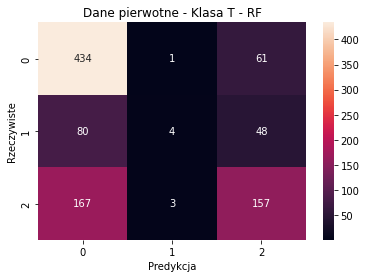

In [7]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa T - RF')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [48]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'],  average='macro')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'],  average='macro')
f1score=f1_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], average='macro')
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.462
Precision: 0.576
F1score: 0.441
